In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# импортируем данные
df = pd.read_csv("spotify-recommendation.csv")
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [3]:
# используем два признака: loudness и speechiness
X = df[["speechiness", "danceability"]].values
model = KMeans(n_clusters=2)
model.fit(X)
print("labels ", model.labels_, "\n")
print("cluster center ", model.cluster_centers_, "\n")
model_predictions = model.predict(X)

labels  [0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 0] 

cluster center  [[0.17613617 0.75531206]
 [0.07799074 0.32683333]] 



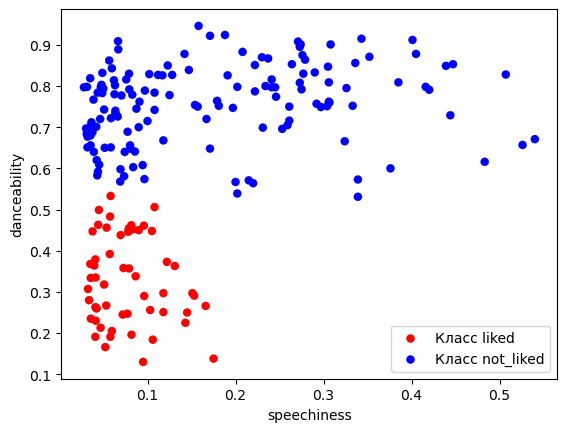

In [4]:
plt.figure(1)
g = ['Класс not_liked' if  e == 0 else 'Класс liked' for e in model_predictions]
c = ['blue' if e == 0 else 'red' for e in model_predictions] 
plt.scatter(X[:,0], X[:,1], color = c, linewidths = 0.1)
plt.scatter(X[2,0], X[2,1], color = c[2], label = g[2], linewidths = 0.1)
plt.scatter(X[1,0], X[1,1], color = c[1], label = g[1], linewidths = 0.1)
plt.xlabel('speechiness')
plt.ylabel('danceability')
plt.legend()
plt.show()

In [5]:
model = KMeans(n_clusters=4)
model.fit(X)
print("labels ", model.labels_, "\n")
print("cluster center ", model.cluster_centers_, "\n")
model_predictions = model.predict(X)

labels  [1 3 2 1 3 1 3 1 1 3 2 3 2 0 0 1 1 1 1 3 3 0 1 3 3 3 0 3 3 3 1 1 2 3 0 2 1
 0 0 3 2 1 0 1 2 2 1 1 2 0 3 3 0 0 2 0 3 3 2 2 0 1 2 0 2 0 3 1 3 3 3 3 1 1
 0 0 0 1 1 3 1 0 1 1 3 1 2 2 1 1 0 0 1 1 3 1 1 1 1 3 1 1 3 2 1 1 2 2 1 3 2
 0 3 2 2 2 1 0 1 3 3 1 1 3 3 3 2 0 0 2 1 1 2 1 3 2 3 0 2 1 3 3 2 0 2 0 2 0
 1 1 3 1 3 2 1 1 3 1 2 2 3 1 3 0 1 1 3 2 0 3 2 2 3 0 0 1 0 3 3 1 1 3 0 0 1
 0 0 3 3 2 2 1 0 0 1] 

cluster center  [[0.0907325  0.554675  ]
 [0.08708413 0.78015873]
 [0.08015641 0.27310256]
 [0.31707547 0.7954717 ]] 



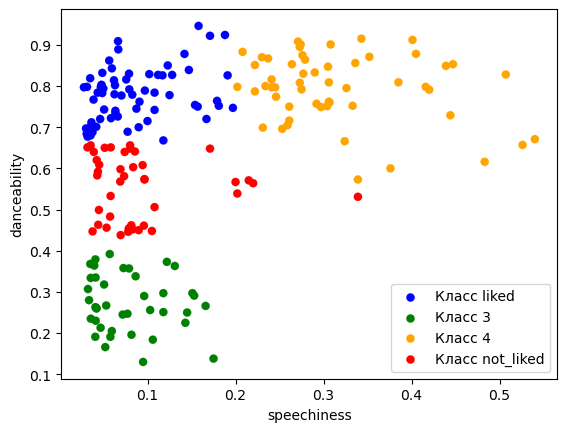

In [9]:
plt.figure(1)
g = ['Класс not_liked' if  e == 0 else 'Класс liked' if e == 1 else 'Класс 3' if e == 2 else 'Класс 4' for e in model_predictions]
c = ['red' if e == 0 else 'blue' if e == 1 else 'green' if e == 2 else 'orange' for e in model_predictions]  
plt.scatter(X[:,0], X[:,1], color = c, linewidths = 0.1)
plt.scatter(X[0,0], X[0,1], color = c[0], label = g[0], linewidths = 0.1)
plt.scatter(X[2,0], X[2,1], color = c[2], label = g[2], linewidths = 0.1)
plt.scatter(X[1,0], X[1,1], color = c[1], label = g[1], linewidths = 0.1)
plt.scatter(X[-2,0], X[-2,1], color = c[-2], label = g[-2], linewidths = 0.1)
plt.xlabel('speechiness')
plt.ylabel('danceability')
plt.legend()
plt.show()